In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
mnist = keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\User\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

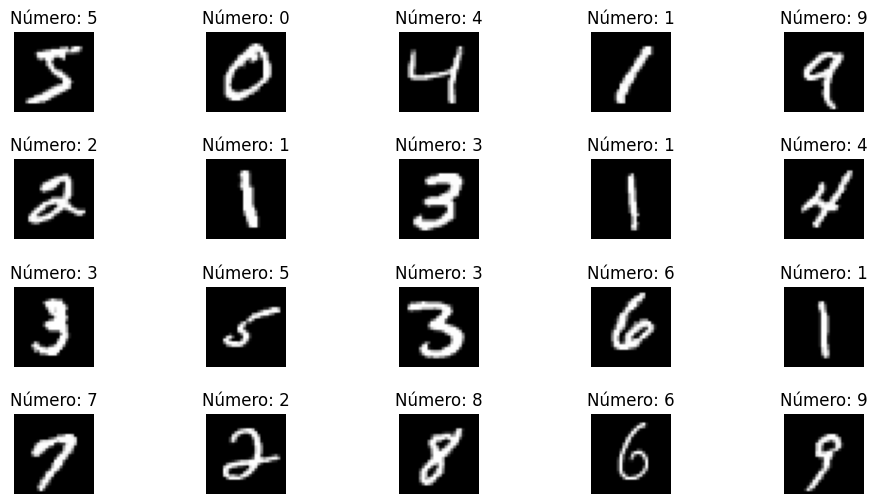

In [4]:
fig, axs = plt.subplots(4,5, figsize=(12,6)) #4 é o número de linhas e 5 o número de colunas

for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Número: {y_train[i]}")
    ax.axis("off")

fig.subplots_adjust(hspace=0.60)    
plt.show()

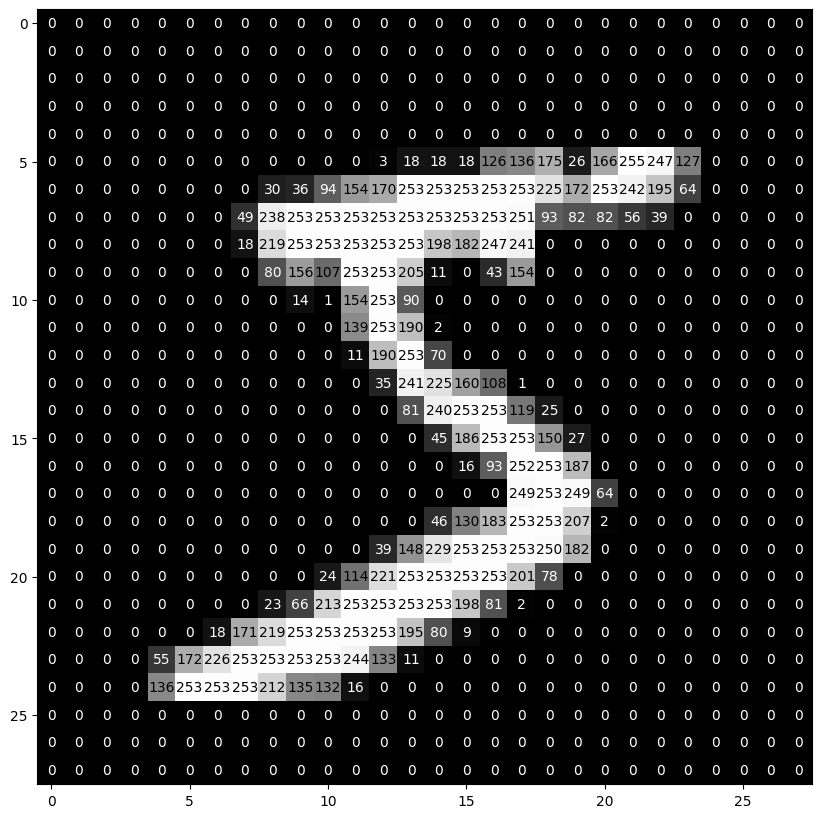

In [5]:
fig, ax = plt.subplots(figsize=(10, 12))

ax.imshow(x_train[0], cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor_cor = x_train[0][linha][coluna]
        ax.annotate(
            str(valor_cor),
            xy=(coluna,linha),
            color = "black" if valor_cor > 100 else "white",
            horizontalalignment = "center",
            verticalalignment = "center"
        )

plt.show()


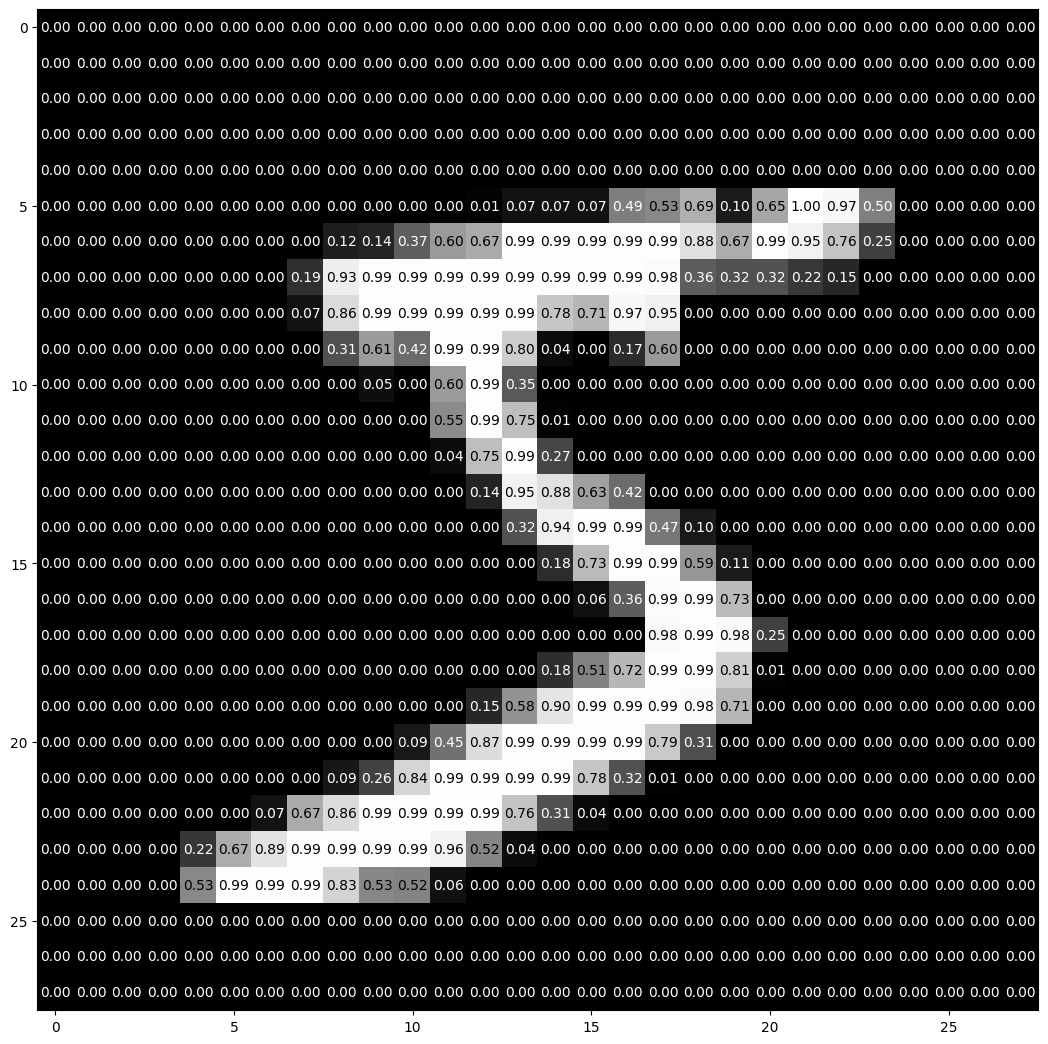

In [6]:
fig, ax = plt.subplots(figsize=(13, 13))

ax.imshow(x_train[0]/255, cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor_cor = x_train[0][linha][coluna]/255
        ax.annotate(
            f"{valor_cor:.2f}",
            xy=(coluna,linha),
            color = "black" if valor_cor > 0.5 else "white",
            horizontalalignment = "center",
            verticalalignment = "center"
        )

plt.show()


Criação do modelo

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28,28))) #Os dados vão chegar dessa forma
model.add(keras.layers.Rescaling(scale=1./255)) #Vão sofrer essa transformação
model.add(keras.layers.Flatten()) #E vai achatar
model.add(keras.layers.Dense(512, activation="relu")) #Criando a camada central
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax")) #Camada de saída

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                

Compilar o modelo Keras

In [8]:
opt = keras.optimizers.Adam(learning_rate=1E-4)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer= opt, loss=loss, metrics=[metric])

Fit do modelo

In [9]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4,
)

history = model.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=256,
    validation_split=0.2,
    callbacks= [early_stop],
)

Epoch 1/300

188/188 [==============================] - 4s 13ms/step - loss: 1.3724 - sparse_categorical_accuracy: 0.5613 - val_loss: 0.4828 - val_sparse_categorical_accuracy: 0.8787
Epoch 2/300
188/188 [==============================] - 2s 12ms/step - loss: 0.5947 - sparse_categorical_accuracy: 0.8187 - val_loss: 0.3204 - val_sparse_categorical_accuracy: 0.9107
Epoch 3/300
188/188 [==============================] - 2s 12ms/step - loss: 0.4467 - sparse_categorical_accuracy: 0.8674 - val_loss: 0.2648 - val_sparse_categorical_accuracy: 0.9226
Epoch 4/300
188/188 [==============================] - 2s 11ms/step - loss: 0.3751 - sparse_categorical_accuracy: 0.8899 - val_loss: 0.2325 - val_sparse_categorical_accuracy: 0.9326
Epoch 5/300
188/188 [==============================] - 2s 11ms/step - loss: 0.3294 - sparse_categorical_accuracy: 0.9037 - val_loss: 0.2076 - val_sparse_categorical_accuracy: 0.9394
Epoch 6/300
188/188 [==============================] - 2s 11ms/step - loss: 0.2944 - spar

Evaluate do modelo

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - sparse_categorical_accuracy: 0.9825


[0.06261616200208664, 0.9825000166893005]

Predict do modelo

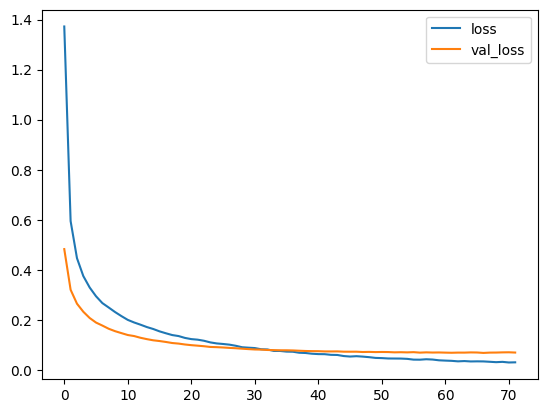

In [11]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

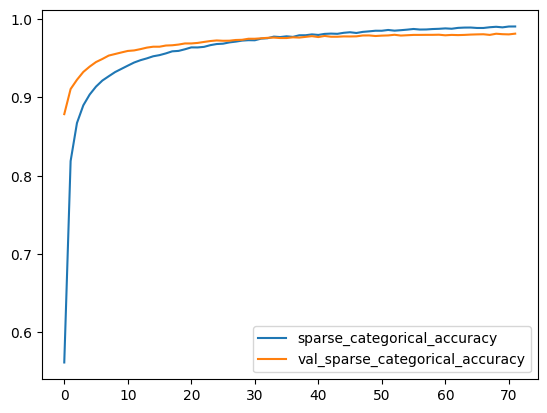

In [12]:
plt.plot(history.history["sparse_categorical_accuracy"], label="sparse_categorical_accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_sparse_categorical_accuracy")
plt.legend()
plt.show()

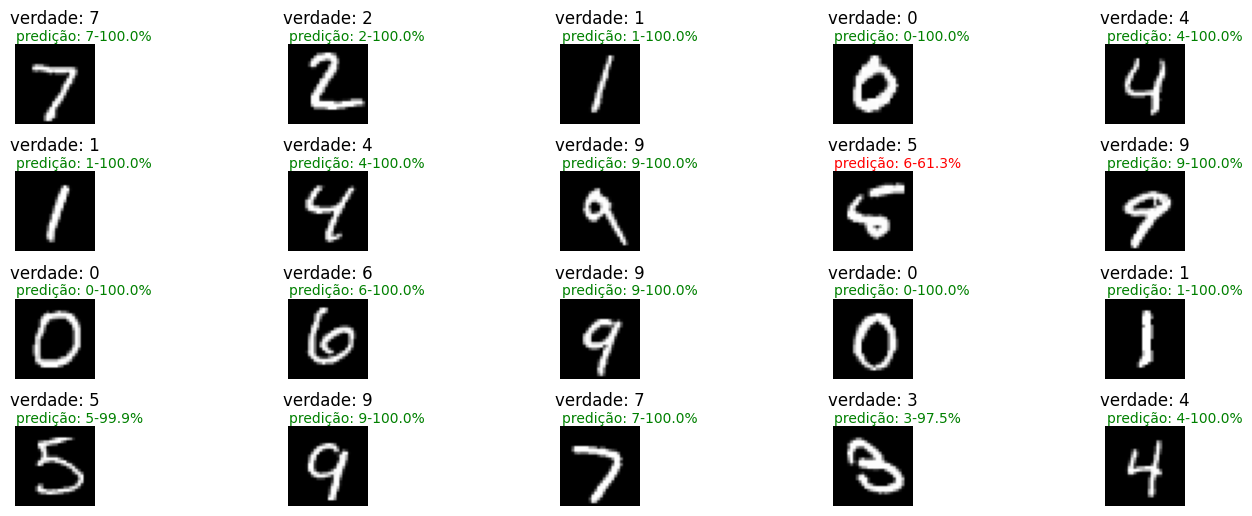

In [13]:
fig, axs = plt.subplots(4,5, figsize=(17,6)) #4 é o número de linhas e 5 o número de colunas

for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i], cmap='gray')
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0]
    ax.set_title(f"verdade: {y_test[i]}", pad=15) #pad é para espaçar
    ax.axis("off")
    ax.text(
        0,
        -2,
        f"predição: {pred.argmax()}-{pred.max():.1%}",
        color="green" if pred.argmax() == y_test[i] else "red"
    )
fig.subplots_adjust(hspace=0.60) 
plt.show()

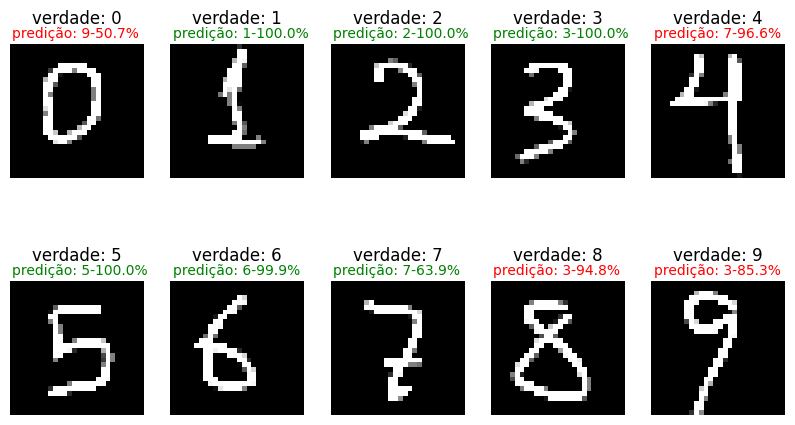

In [14]:
from pathlib import Path

test_images_dir = Path(r"C:\Users\User\Desktop\Ciência de Dados\Curso Hashtag\Deep learning\test_images")

fig, axs = plt.subplots(2, 5, figsize=(10,5))

all_pred = {}

for i, (img, ax) in enumerate(zip(sorted(test_images_dir.glob("*.png")), axs.flat)):
    name = img.name.split(".")[0] #O [0] é por conta do batch que veio a partir do expand.dims
    #
    img = keras.preprocessing.image.load_img(
        img, target_size=(28,28), color_mode="grayscale"
    )
    #
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = 255 - img_array
    img_array = tf.expand_dims(img_array, 0)
    
    pred = model.predict(img_array, verbose=0)
    all_pred[name] = pred
    
    ax.imshow(img_array[0], cmap='gray')
    ax.set_title(f"verdade: {name}", pad=15) #pad é para espaçar
    ax.axis("off")
    ax.text(
        0,
        -2,
        f"predição: {pred.argmax()}-{pred.max():.1%}",
        color="green" if str(pred.argmax()) == name else "red"
    )
fig.subplots_adjust(hspace=0.60) 
plt.show()


In [15]:
x = all_pred["7"]
x

array([[9.7867869e-06, 2.7049938e-04, 3.3205050e-01, 2.8494781e-02,
        6.4483481e-07, 1.0407737e-06, 1.4834051e-06, 6.3878947e-01,
        3.7833577e-04, 3.3578585e-06]], dtype=float32)